<a href="https://colab.research.google.com/github/Sanjay1802/Machine-Learning/blob/main/Kmeans_14_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Dataset-https://drive.google.com/file/d/1yXe0SfxPGimbqRt3p_H5ol9rp_-GQmDY/view?usp=sharing/

In [ ]:
#Divide the player in groups based upon their stats

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Cricket.csv',encoding='latin')  #encoding='latin' ,'utf-8', 'ISO
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.2+ KB


In [ ]:
#span = {start,end}
#Start , End ={start,end}
#EXP= End-Start   {2012-1989} -> 23
# drop span start end

In [ ]:
# 1989-2012 , "-" --> 1989, 2012, [1989, 2012]

In [ ]:
df[['Start','End']]=df['Span'].str.split('-',expand=True)

In [ ]:
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Start,End
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3,1975,1991
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6,2002,2015
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7,2001,2011
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15,1998,2009


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
 13  Start   79 non-null     object 
 14  End     79 non-null     object 
dtypes: float64(2), int64(8), object(5)
memory usage: 9.4+ KB


In [ ]:
df['Start']=df['Start'].astype(int)
df['End']=df['End'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
 13  Start   79 non-null     int64  
 14  End     79 non-null     int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 9.4+ KB


In [ ]:
df['Exp']=df['End']-df['Start']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
 13  Start   79 non-null     int64  
 14  End     79 non-null     int64  
 15  Exp     79 non-null     int64  
dtypes: float64(2), int64(11), object(3)
memory usage: 10.0+ KB


In [ ]:
df.drop(['Span','Start','End'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Mat     79 non-null     int64  
 2   Inns    79 non-null     int64  
 3   NO      79 non-null     int64  
 4   Runs    79 non-null     int64  
 5   HS      79 non-null     object 
 6   Ave     79 non-null     float64
 7   BF      79 non-null     int64  
 8   SR      79 non-null     float64
 9   100     79 non-null     int64  
 10  50      79 non-null     int64  
 11  0       79 non-null     int64  
 12  Exp     79 non-null     int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 8.2+ KB


In [ ]:
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133*,45.03,7908,64.92,11,31,3,16
75,Misbah-ul-Haq (PAK),162,149,31,5122,96*,43.40,6945,73.75,0,42,6,13
76,PD Collingwood (ENG),197,181,37,5092,120*,35.36,6614,76.98,5,26,7,10
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [ ]:
#HS -- 200* --> scored 200 and reamained not out
#problem in typecast --> "*"
#str.replace('*',"")  -> 200*--> 200

In [ ]:
df['HS']=df['HS'].str.replace('*','')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Mat     79 non-null     int64  
 2   Inns    79 non-null     int64  
 3   NO      79 non-null     int64  
 4   Runs    79 non-null     int64  
 5   HS      79 non-null     object 
 6   Ave     79 non-null     float64
 7   BF      79 non-null     int64  
 8   SR      79 non-null     float64
 9   100     79 non-null     int64  
 10  50      79 non-null     int64  
 11  0       79 non-null     int64  
 12  Exp     79 non-null     int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 8.2+ KB


In [ ]:
df['HS']=df['HS'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Mat     79 non-null     int64  
 2   Inns    79 non-null     int64  
 3   NO      79 non-null     int64  
 4   Runs    79 non-null     int64  
 5   HS      79 non-null     int64  
 6   Ave     79 non-null     float64
 7   BF      79 non-null     int64  
 8   SR      79 non-null     float64
 9   100     79 non-null     int64  
 10  50      79 non-null     int64  
 11  0       79 non-null     int64  
 12  Exp     79 non-null     int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 8.2+ KB


In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# less data
# domain

In [ ]:
df_copy=df.copy()

In [ ]:
df_copy

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [ ]:
df_copy.drop('Player',axis=1,inplace=True)

In [ ]:
df_copy

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...
74,128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
75,162,149,31,5122,96,43.40,6945,73.75,0,42,6,13
76,197,181,37,5092,120,35.36,6614,76.98,5,26,7,10
77,198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [ ]:
# Standardization
# 27:9  --> 3:1
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
df_scaled=sc.fit_transform(df_copy)

In [ ]:
df_scaled

array([[ 2.95528204e+00,  3.16933340e+00,  7.64962749e-01,
         4.26232808e+00,  1.63244320e+00,  1.07229395e+00,
         3.68121424e+00,  7.03151526e-01,  4.65672622e+00,
         3.05005720e+00,  1.14583653e+00,  2.81278702e+00],
       [ 2.15517925e+00,  2.13891509e+00,  7.64962749e-01,
         2.60911662e+00,  6.35223595e-01,  5.87724608e-01,
         2.63538469e+00, -4.41394951e-02,  1.67188751e+00,
         2.86541772e+00,  2.96670622e-01,  3.80938324e-01],
       [ 1.76190839e+00,  1.92424461e+00,  6.25396797e-01,
         2.40009894e+00,  4.74381724e-01,  5.96225824e-01,
         2.31965067e+00,  1.10996904e-01,  2.29372891e+00,
         2.18840630e+00,  1.14583653e+00,  9.88900497e-01],
       [ 2.71118288e+00,  2.89741746e+00, -8.40045698e-01,
         2.29204075e+00,  1.27859108e+00, -1.04790945e+00,
         1.58829472e+00,  1.20709133e+00,  2.04499235e+00,
         1.32675540e+00,  3.52350108e+00,  2.50880593e+00],
       [ 2.75186607e+00,  2.68274698e+00,  6.2539679

In [ ]:
df_scaled=pd.DataFrame(df_scaled,columns=df_copy.columns)

In [ ]:
df_scaled

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,2.955282,3.169333,0.764963,4.262328,1.632443,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837,2.812787
1,2.155179,2.138915,0.764963,2.609117,0.635224,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671,0.380938
2,1.761908,1.924245,0.625397,2.400099,0.474382,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837,0.988900
3,2.711183,2.897417,-0.840046,2.292041,1.278591,-1.047909,1.588295,1.207091,2.044992,1.326755,3.523501,2.508806
4,2.751866,2.682747,0.625397,1.984430,-0.168986,-0.876185,1.996354,-0.034000,0.925678,1.880674,2.504502,0.988900
...,...,...,...,...,...,...,...,...,...,...,...,...
74,-1.587674,-1.481860,-1.188961,-0.979677,-0.522838,1.106299,-0.559768,-1.457604,-0.069268,-0.950465,-1.741328,0.684919
75,-1.126598,-1.167010,0.067133,-0.984410,-1.713068,0.829159,-0.863213,-0.562275,-1.437319,-0.273453,-1.231828,-0.227024
76,-0.651961,-0.709047,0.485831,-0.996241,-0.941027,-0.537836,-0.967512,-0.234765,-0.815478,-1.258197,-1.061995,-1.138967
77,-0.638400,-0.995274,0.206699,-0.997819,0.217035,0.208570,-1.317278,1.332823,-0.691110,-1.012011,0.296671,-0.834986


In [ ]:
# model building
# K values ==??? --? elbow curve (WCSS)
# elbow curve -> where ever we see a sharpe edge forming elbow like curev that will be your potential answer
                # 1st curve == optimal K value

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k_values=[2,3,4,5,6,7,8,9,10]

In [ ]:
WCSS=[]

for k in k_values:
  temp_model=KMeans(n_clusters=k, max_iter=100)
  temp_model.fit(df_scaled)
  WCSS.append(temp_model.inertia_)



Inertia represents the Within-Cluster Sum of Squared Distances (WCSS).  
It measures how close each point is to the centroid of its assigned cluster.

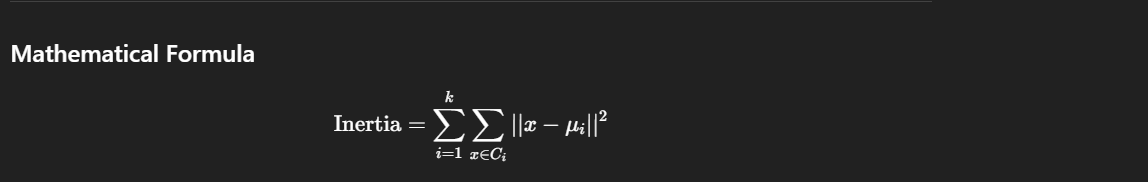

## Where:
k       = number of clusters  
Cᵢ      = set of points in cluster i  
x       = a data point  
μᵢ      = centroid of cluster i  
||x − μᵢ||² = squared Euclidean distance from x to its centroid  

## Meaning:
Inertia adds up the squared distance between every point and its assigned cluster centroid.  
Lower inertia indicates more compact and well-formed clusters.


In [ ]:
WCSS

[649.8691266392077,
 531.568580780685,
 464.68311571555233,
 436.1619389294901,
 394.84880072632404,
 353.30540621047317,
 340.27144028470656,
 304.70360795971993,
 272.85931075350925]

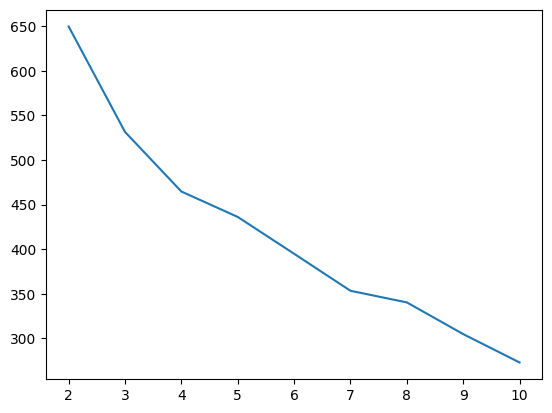

In [ ]:
plt.plot(k_values,WCSS)

In [ ]:
# K==4

final_model=KMeans(n_clusters=4,max_iter=100)
final_model.fit(df_scaled)

KMeans(max_iter=100, n_clusters=4)

In [ ]:
final_model.labels_

array([3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2], dtype=int32)

In [ ]:
len(final_model.labels_)

79

In [ ]:
df['ClusterID']=final_model.labels_

In [ ]:
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,CusterID,ClusterID
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,3,3
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,3,3
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,3,3
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,3,3
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16,0,0
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13,0,0
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10,0,0
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11,0,0


In [ ]:
group0=df[df['ClusterID']==0]
group0

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,CusterID,ClusterID
25,V Kohli (INDIA),188,180,29,8146,183,53.94,8952,90.99,27,43,11,9,0,0
34,HM Amla (SA),156,153,10,7186,159,50.25,8069,89.05,25,33,3,9,0,0
37,GC Smith (Afr/SA),197,194,10,6989,141,37.98,8648,80.81,10,47,8,11,0,0
38,MG Bevan (AUS),232,196,67,6912,108,53.58,9320,74.16,6,46,5,10,0,0
39,G Kirsten (SA),185,185,19,6798,188,40.95,9436,72.04,13,45,11,10,0,0
42,IVA Richards (WI),187,167,24,6721,189,47.00,7451,90.20,11,45,7,16,0,0
46,LRPL Taylor (NZ),190,176,29,6486,131,44.12,7906,82.03,17,37,9,11,0,0
49,ML Hayden (AUS/ICC),161,155,15,6133,181,43.80,7767,78.96,10,36,9,15,0,0
51,DM Jones (AUS),164,161,25,6068,145,44.61,8362,72.56,7,46,6,10,0,0
52,DC Boon (AUS),181,177,16,5964,122,37.04,9157,65.13,5,37,6,11,0,0


In [ ]:
group1=df[df['ClusterID']==1]
group1

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,CusterID,ClusterID
7,SC Ganguly (Asia/INDIA),311,300,23,11363,183,41.02,15416,73.70,22,72,16,15,1,1
8,R Dravid (Asia/ICC/INDIA),344,318,40,10889,153,39.16,15284,71.24,12,83,13,15,1,1
9,BC Lara (ICC/WI),299,289,32,10405,169,40.48,13086,79.51,19,63,16,17,1,1
10,TM Dilshan (SL),330,303,41,10290,161,39.27,11933,86.23,22,47,11,17,1,1
11,Mohammad Yousuf (Asia/PAK),288,273,40,9720,141,41.71,12942,75.10,15,64,15,12,1,1
12,AC Gilchrist (AUS/ICC),287,279,11,9619,172,35.89,9922,96.94,16,55,19,12,1,1
13,MS Dhoni (Asia/INDIA),295,255,70,9496,183,51.32,10706,88.69,10,64,8,13,1,1
14,M Azharuddin (INDIA),334,308,54,9378,153,36.92,12669,74.02,7,58,9,15,1,1
15,AB de Villiers (Afr/SA),222,213,39,9319,162,53.55,9295,100.25,24,53,7,12,1,1
16,PA de Silva (SL),308,296,30,9284,145,34.90,11443,81.13,11,64,17,19,1,1


In [ ]:
group2=df[df['ClusterID']==2]
group2

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,CusterID,ClusterID
28,SP Fleming (ICC/NZ),280,269,21,8037,134,32.40,11242,71.49,8,49,17,13,2,2
30,SR Waugh (AUS),325,288,58,7569,120,32.90,9971,75.91,3,45,15,16,2,2
31,A Ranatunga (SL),269,255,47,7456,131,35.84,9571,77.90,4,49,18,17,2,2
32,Javed Miandad (PAK),233,218,41,7381,119,41.70,11014,67.01,8,50,8,21,2,2
33,Younis Khan (PAK),265,255,23,7249,144,31.24,9628,75.29,7,48,22,15,2,2
35,Saleem Malik (PAK),283,256,38,7170,102,32.88,9383,76.41,5,47,19,17,2,2
36,NJ Astle (NZ),223,217,14,7090,145,34.92,9760,72.64,16,41,19,12,2,2
40,A Flower (ZIM),213,208,16,6786,145,35.34,9097,74.59,4,55,13,11,2,2
41,Shoaib Malik (PAK),252,228,36,6765,143,35.23,8278,81.72,9,39,13,18,2,2
43,GW Flower (ZIM),221,214,18,6571,142,33.52,9723,67.58,6,40,18,18,2,2


In [ ]:
group3=df[df['ClusterID']==3]
group3

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,CusterID,ClusterID
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,3,3
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,3,3
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,3,3
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,3,3
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,3,3
5,Inzamam-ul-Haq (Asia/PAK),378,350,53,11739,137,39.52,15812,74.24,10,83,20,16,3,3
6,JH Kallis (Afr/ICC/SA),328,314,53,11579,139,44.36,15885,72.89,17,86,17,18,3,3


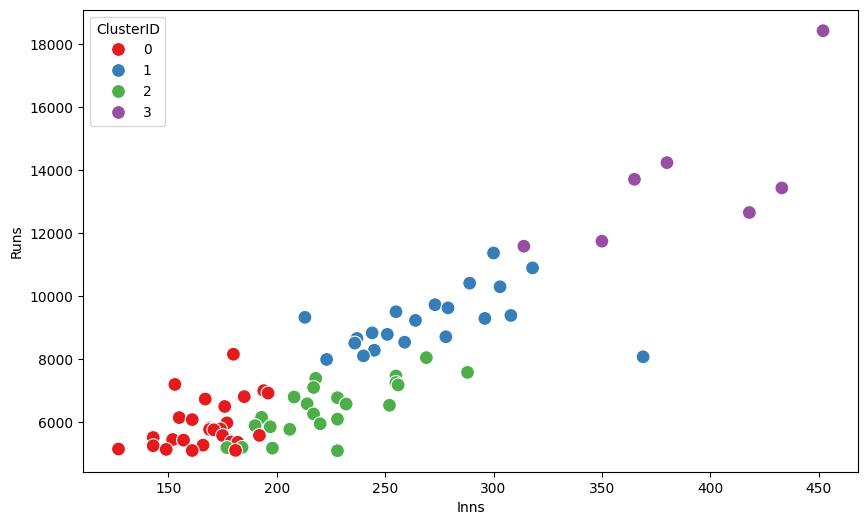

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Inns',y='Runs',hue='ClusterID',s=100,palette='Set1')
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
fig=px.scatter_3d(df,x='Inns',y='Runs',z='100',color='ClusterID',hover_name='Player',title='3D visulaization for the Kmeans')
fig.update_layout(scene=dict(xaxis_title='No of innings player',yaxis_title='No of Runs scored',zaxis_title='no.Centuries'))
fig.show()